# Modeling crazy beliefs with logistic classifiers

This notebook assesses the ability of a discriminative classification model (logistic regression) to account for experimental results in the "crazy beliefs" category learning study. The study includes four experiments in which a single learner must learn to classify items varying along a continuous 1D manifold into two categories. The learner first receives supervised training about two items, one from each category, and on that basis forms an initial belief about the category boundary, which is assessed by having the learner classify a set of evenly-spaced ("grid") items without feedback. The learner then classifies 301 stimuli evenly distributed along the manifold range, and after each categorization decision, receives information from two _sources_ indicating their belief about the true category label. Finally, the learner again classifies a set of grid items to establish where her final belief about the category boundary lies. We measure the initial location of the learner's boundary, the final location, and the degree and direction of shift. 

## Read in useful scripts

In [62]:
fitwlrm <- dget("fitwlrm.R") #Fit weighted logistic regression model
get.final <- dget("get_final.r") #Get final boundary
get.initb <- dget("get_initb.r") #Get initial boundary
get.trust <- dget("get_trust.R") #Get trust for sources given current model
get.wlrm.pred <- dget("get_wlrm_pred.R") #Get predictions for weighted LR model
logistic <- dget("logistic.r") #Logistic function
makex <- dget("makex.r") #Function to generate values of x
makey <- dget("makey.r") #Function to generate labels
plot.wlrm <- dget("plot_wlrm.R") #Computes and plots weighted LR model
plot.wlrm.seq <- dget("plot_wlrm_seq.R") #Computes and plots a sequence of weighted LR models

Compute the proportion p of weight given to far source f as follows:

s = p * f + (1-p) * c  
s = p * f + c - pc  
s - c = pf - pc  
s - c = p(f - c)  
p = (s-c)/(f-c)  

In [63]:
get.pwt <- function(s, f, c){
    #Return proportion of weight given to far source, given
    #c = distance between initial boundary and close source
    #f = distance between initial boundary and far source
    #s = amount of shift
    
    (s-c)/(f-c)
}

## Make objects with study characteristics

In [64]:
#All studies
x <- 0:300 #Set of stimulus items
gtest <- c(6:24)*10 #grid test items

#Experiment 1
citems <- c(rep(100, times = 10), rep(200, times = 10)) #Captain-labelled items
citems <- citems + ((runif(20)*2) - 1)  #Add small amount of noise to captain-labeled items
clabs <- c(rep(1, times = 10), rep(0, times = 10))      #Category labels for captain-labelled items

is <- rep(0, times = 301) #initialize source with zeros
e1s1 <- is; e1s2 <- is    #initalize experiment 1 sources
e1s1[1:51] <- 1           #Source 1 labels items 0-50 with 1 
e1s2[1:166] <- 1          #Source 2 labels itesm 0-165 with 1

#Experiment 2
e2s1 <- e1s2              #Source 1 (fixed) is the same as source 2 in experiment 1

e2s2 <- matrix(0, 15, 301)  #Source 2 boundary varies across learners in this experiment;
                            #We will simulate 15 different far sources
for(i1 in c(1:15)) e2s2[i1, c(1:(i1*10))] <- 1 #Source 2 labels for 15 source

#Experiment 3
e3citems <- c(rep(30, times = 10), rep(170, times = 10))    #For experiment 3, captain-labeled items are at 30 and 170
e3citems <- e3citems + ((runif(20)*2) - 1)  #Add small amount of noise to captain-labeled items
e3s1 <- is; e3s2 <- is    #initalize experiment 3 sources
e3s1[1:101] <- 1           #Source 1 labels items 0-100 with 1 
e3s2[1:201] <- 1          #Source 2 labels itesm 0-200 with 1

#Experiment 4
e4citems <- c(30, 170)    #For experiment 4, captain-labeled items are at 30 and 170

#Source labels for experiment 4
e4has1 <- is; e4has1[1:126] <- 1               #High agreement
e4has2 <- is; e4has2[1:176] <- 1               
e4mas1 <- is; e4mas1[1:101] <- 1               #moderate agreement
e4mas2 <- is; e4mas2[1:201] <- 1               
e4mds1 <- is; e4mds1[1:76] <- 1               #moderate disagreement
e4mds2 <- is; e4mds2[1:226] <- 1               
e4hds1 <- is; e4hds1[1:51] <- 1               #high disagreement
e4hds2 <- is; e4hds2[1:251] <- 1               



## Model with equal weight given to both sources

Here we fit logistic classifiers that give equal weight to both sources and see how they model each experiment.

### Experiment 1

Experiment 1 uses labeled items at 100 and 200 with an expected boundary at 150. It then has a close source with a boundary at 165 and a far source with a boundary at 50. The data show that the learner's boundary shifts toward the far source, but does not shift all the way to the midpoint between the close and far source boundaries (at 107.5).

In [65]:
m1 <- glm(clabs ~ citems, family = "binomial") #Fit classifier to initial data from suprevised phase
msitems <- c(0:300, 0:300) + ((runif(602)*2)-1)  #Items labeled by multiple sources
mslabs <- c(e1s1, e1s2)                        #Concatenate labels given by two sources

m2 <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight


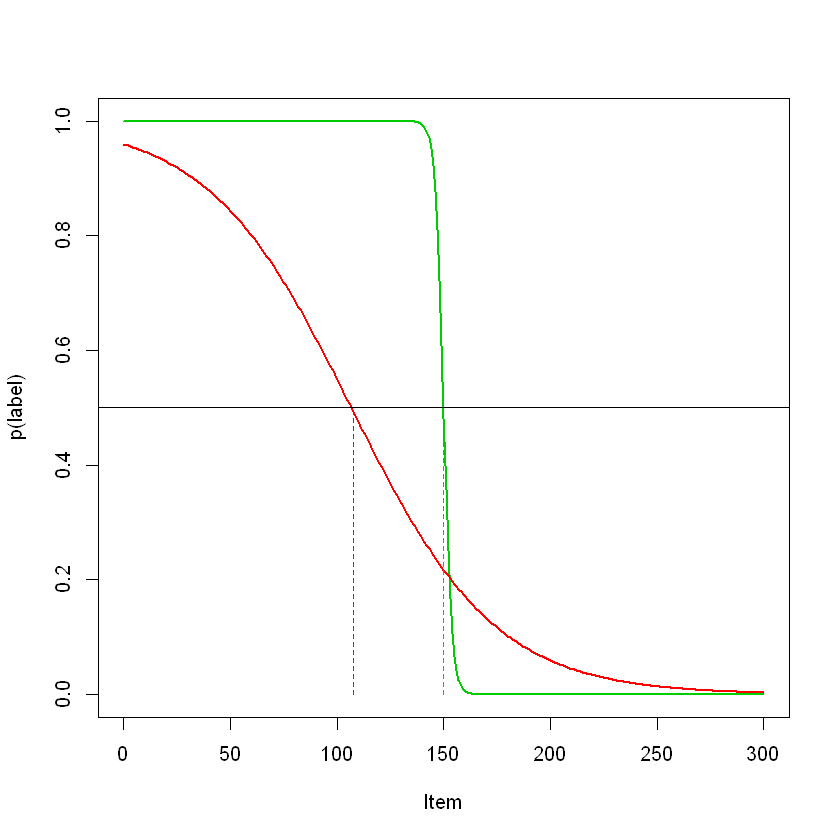

In [66]:
#Plot predictions for models 1 and 2
plot(c(0:300), get.wlrm.pred(m1, c(0:300)), ylim = c(0,1), xlim = range(0,300), 
     type = "l", lwd = 2, col = 3,
    xlab = "Item", ylab = "p(label)")
lines(c(0:300), get.wlrm.pred(m2, c(0:300)), lwd = 2, col = 2)
abline(h = 0.5)
lines(c(150,150), c(0,.5), lty=2, col=3)
xb <- mean(c(50,165))
lines(c(xb,xb), c(0,.5), lty=2, col=2)
#abline(v = mean(c(50, 165)), lty = 2)

In [67]:
#Save plot
pdf("disc_eqwt_expt1.pdf", height=8, width=8)
par(mar = c(4,3,2,2), oma = c(2,2,2,2))
plot(c(0:300), get.wlrm.pred(m1, c(0:300)), ylim = c(0,1), xlim = range(0,300), 
     type = "l", lwd = 2, col = 3,
    xlab = "Item", ylab = "p(label)")
lines(c(0:300), get.wlrm.pred(m2, c(0:300)), lwd = 2, col = 2)
abline(h = 0.5)
lines(c(150,150), c(0,.5), lty=2, col=3)
xb <- mean(c(50,165))
lines(c(xb,xb), c(0,.5), lty=2, col=2)
dev.off()

png 
  2

Green line shows the initial classification function, red line shows the final function. When both sources are given equal weight, boundary shifts all the way to the midpoint between the sources (vertical dotted line).

### Experiment 2

In the study all participants received one "fixed" source using a boundary 15 units from the range midpoint, and one "varying" source using a boundary on the opposite side of the range, and sampled at random with uniform probability from 0-149 units on that side of the range. Each participant got a different varying source. We then measured how much that participant's boundary shifted, and from this computed the proportion of weight p given to the varying source. The key finding is that weight given to the varying source was 1.0 when the source was very near the learner's initial boundary, but dropped with distance according to a nonlinear function that was initially steep but grew shallower with increasing distance (the heuristic evidence weighting or HEW function).

Here we simulate the study using 15 equally-spaced varying sources, corresponding to 15 simulated participants. We fit an unweighted logistic regression model to each simulated participant, with each participant receiving a different varying source. The fixed source boundaries are the same as in experiment 2 so we will use the same m1 model from above. From the model we compute the amount of boundary shift for each participant, then estimate the proportion of weight given to the far source under this model using the same equation as with the participants.

In [68]:
b1 <- -1 * m1$coefficients[1]/m1$coefficients[2]   #Compute initial boundary position
b2 <- rep(0, times = 15)
options(warn=-1)
for(i1 in c(1:15)){
    mslabs <- c(e2s1, e2s2[i1,])                        #Concatenate labels given by two sources
    m <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight
    b2[i1] <- -1 * m$coefficients[1]/m$coefficients[2]   #Compute final boundary position
}
options(warn=0)
pwt <- rep(0, times = 15)
s <- b2 - b1   #Amount of shift
f <- rowSums(e2s2) - b1  #Distance of variable source to initial boundary
c <- sum(e2s1) - b1      #Distance of fixed source to initial boundary

for(i1 in c(1:15)) pwt[i1] <- get.pwt(s[i1], f[i1], c)

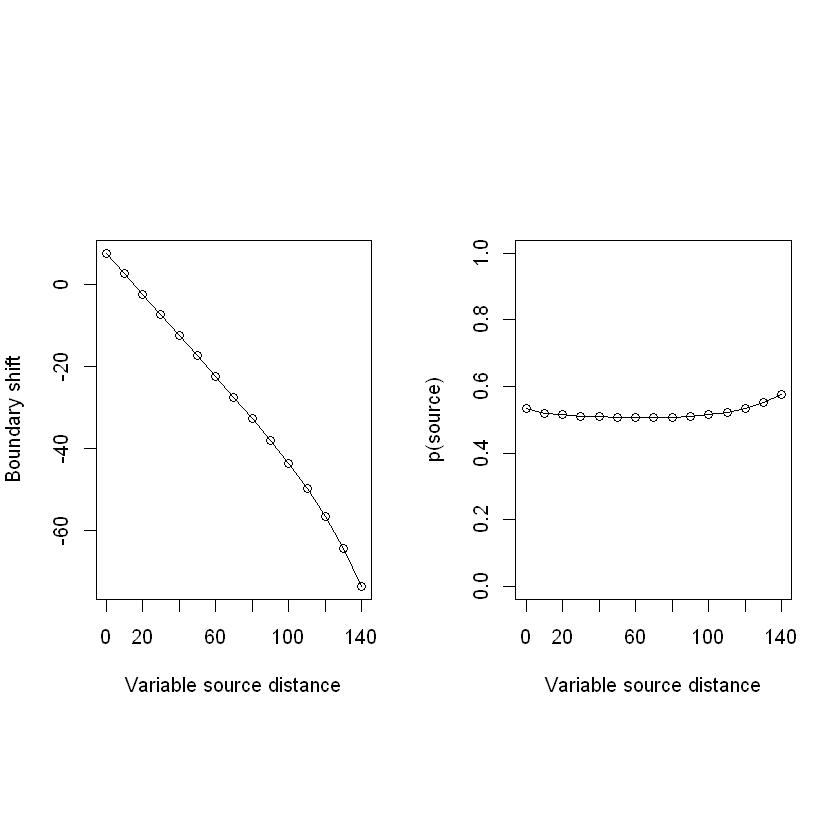

In [69]:
par(mfrow = c(1,2), mar = c(10,4,10,2))
plot(150 - rowSums(e2s2), b2- b1, type = "o", ylab = "Boundary shift", xlab = "Variable source distance")
plot(150 - rowSums(e2s2), pwt, type = "o", ylab = "p(source)", xlab = "Variable source distance",
    ylim = c(0,1))

The negative boundary shift increases approximately linearly with the distance of the variable source, while the estimate of the weight given to the far source stays around 0.5

### Experiment 3

In experiment 3, one group begins with labeled items at 30 and 170, with a boundary near 100. The two sources then use boundaries at 100 and 200. No learning is observed. In the experiment, a second group beings with labeled items at 130 and 270 with an initial boundary near 200, and no learning is observed. Because the behaviors of the logistic classifier are symmetric, we only simulated one group condition.

In [70]:
m1 <- glm(clabs ~ e3citems, family = "binomial") #Fit classifier to initial data from suprevised phase
msitems <- c(0:300, 0:300) + ((runif(602)*2)-1)  #Items labeled by multiple sources
mslabs <- c(e3s1, e3s2)                        #Concatenate labels given by two sources

m2 <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight


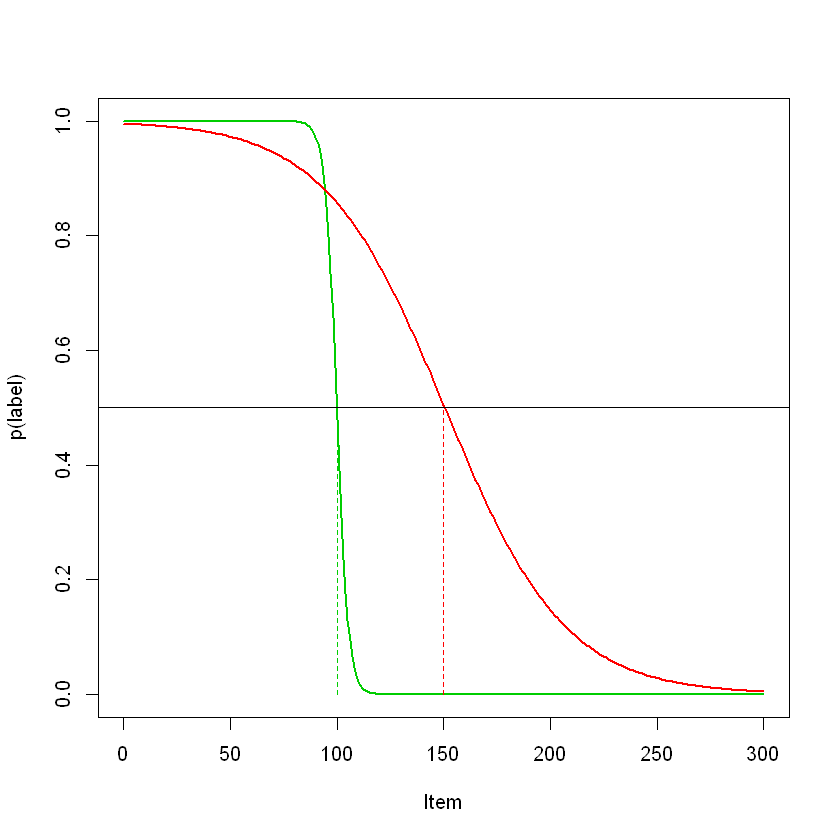

In [87]:
#Plot predictions for models 1 and 2
plot(c(0:300), get.wlrm.pred(m1, c(0:300)), ylim = c(0,1), xlim = c(0,300), 
     type = "l", lwd = 2, col = 3,
    xlab = "Item", ylab = "p(label)")
lines(c(0:300), get.wlrm.pred(m2, c(0:300)), lwd = 2, col = 2)
lines(c(100,100), c(0,.5), lty=2, col=3)
lines(c(150,150), c(0,.5), lty = 2, col=2)
abline(h=.5)

The unweighted model shifts its boundary to the midpoint between two sources.

In [88]:
#Save plot
pdf("disc_eqwt_exp3.pdf", width=8, height=8)
par(mar = c(4,3,2,2), oma = c(2,2,2,2))
plot(c(0:300), get.wlrm.pred(m1, c(0:300)), ylim = c(0,1), xlim = c(0,300), 
     type = "l", lwd = 2, col = 3,
    xlab = "Item", ylab = "p(label)")
lines(c(0:300), get.wlrm.pred(m2, c(0:300)), lwd = 2, col = 2)
lines(c(100,100), c(0,.5), lty=2, col=3)
lines(c(150,150), c(0,.5), lty = 2, col=2)
abline(h=.5)
dev.off()


png 
  2

### Experiment 4

In experiment 4 participants get supervised items at 30/170 with a boundary at 100, then have two sources using boundaries centered on 150, but varying in their distance from that midpoint. Participants shift boundaries toward the midpoint when both are close to the midpoint (high agreement; ha condition) and when they are far from the midpoint (high disagreement; hd condition), but show less/no shift when source boundaries are moderately far from the midpoint (moderate agreement or md; moderate disagreement or md). 

We simulated this study in the same was as in Experiment 3, but now including, in 4 different simulations, sources who employ the same boundaries used in the high agreement, moderate agreement, moderate disagreement, and high disagreement conditions of the study. We then measured the boundary shift magnitude and direction in each of these 4 conditions.

In [72]:
m1 <- glm(clabs ~ e3citems, family = "binomial") #Fit classifier to initial data from suprevised phase
msitems <- c(0:300, 0:300) + ((runif(602)*2)-1)  #Items labeled by multiple sources

mslabs <- c(e4has1, e4has2)                        #Concatenate labels given by two sources
mha <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight

mslabs <- c(e4mas1, e4mas2)                        #Concatenate labels given by two sources
mma <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight

mslabs <- c(e4mds1, e4mds2)                        #Concatenate labels given by two sources
mmd <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight

mslabs <- c(e4hds1, e4hds2)                        #Concatenate labels given by two sources
mhd <- glm(mslabs ~ msitems, family = "binomial")  #Fit final classifier to all data, giving both sources equal weight



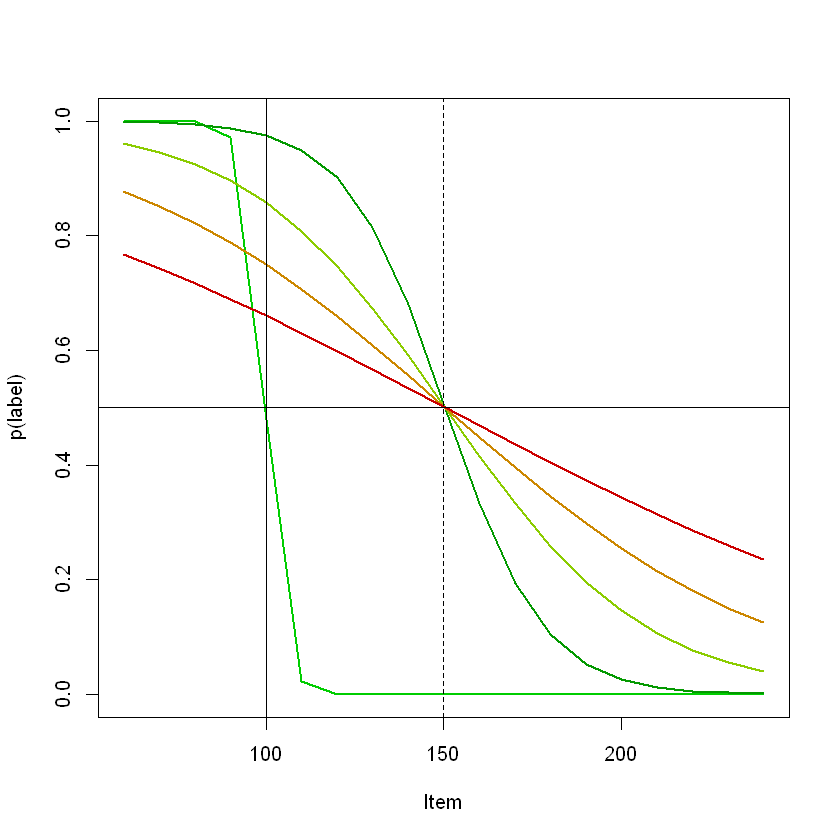

In [73]:
#Plot predictions
plot(gtest, get.wlrm.pred(m1, gtest), ylim = c(0,1), xlim = range(gtest), 
     type = "l", lwd = 2, col = 3,
    xlab = "Item", ylab = "p(label)")
lines(gtest, get.wlrm.pred(mha, gtest), lwd = 2, col = hsv(.33,1,.6))
lines(gtest, get.wlrm.pred(mma, gtest), lwd = 2, col = hsv(.22,1,.8))
lines(gtest, get.wlrm.pred(mmd, gtest), lwd = 2, col = hsv(.11,1,.8))
lines(gtest, get.wlrm.pred(mhd, gtest), lwd = 2, col = hsv(0,1,.8))

abline(h = 0.5)
abline(v = 100)
abline(v = mean(c(100, 200)), lty = 2)

Different colored lines show the final boundaries for the four different conditions (ha = dark green, ma = light green, md = orange, hd = red). The boundary always ends up at the midpoint between sources. All that changes is the slope of the classification function.

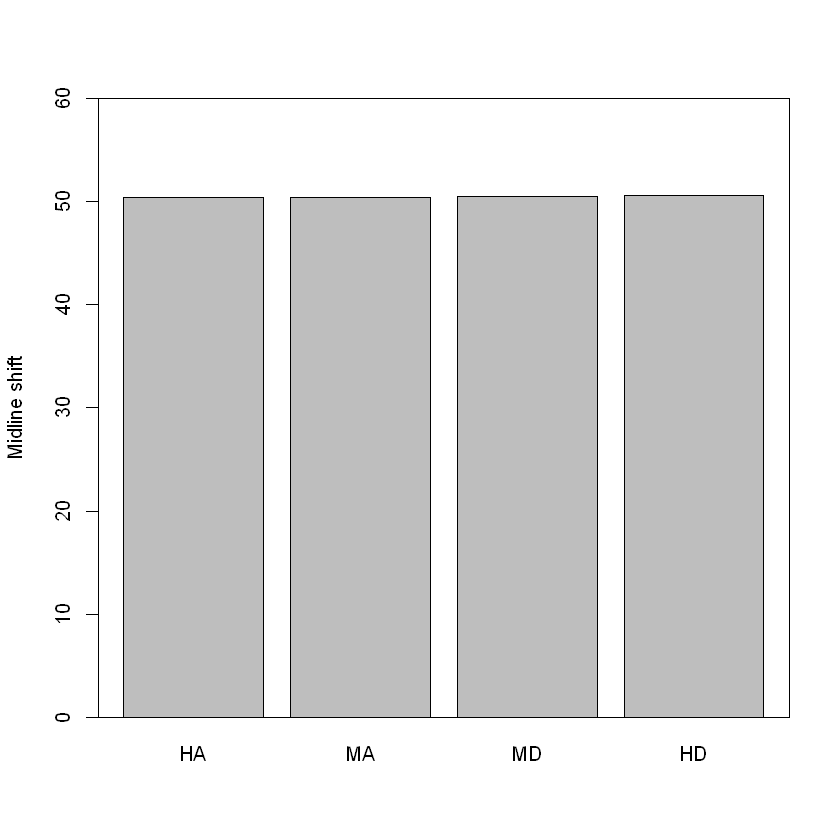

In [74]:
bshift <- rep(0, times = 4)
bshift[1] <- -1 * mha$coefficients[1]/mha$coefficients[2] - 100 
bshift[2] <- -1 * mma$coefficients[1]/mma$coefficients[2] - 100 
bshift[3] <- -1 * mmd$coefficients[1]/mmd$coefficients[2] - 100 
bshift[4] <- -1 * mhd$coefficients[1]/mhd$coefficients[2] - 100 

barplot(bshift, beside = T, names.arg = c("HA","MA","MD","HD"), ylab = "Midline shift", ylim = c(0,60)); box()

The amount of shift toward midline is always the same

## Weighted models

Next we consider models that give different amounts of weight to each source depending on that source's agreement with the learner. We fit _weighted logistic regression_ models, in which a proportional weight is given to each x, y pair in the training set. x,y pairs provided by source 1 are given source 1's weight; those provided by source 2 are given source 2's weight. We consider two ways of weighting the sources: _fixed_ weighting, in which the initial model from supervised learning is always used to assign weights, and _online_ weighting, in which the learner's current model is always used to assign weights.

## Fixed weighting

This variant always weights each source according to their agreement with the learner's _initial model_ learned from the supervised examples. For _n_ learning trials we compute the weights for each source using the get.trust function. The function takes a logistic classification model m, a set of x values indicating the items viewed thus far, and the labels provided for each item by source 1 and by source 2. Expected labels for the x items are generated using the model m, and for each source, we sum the number of times the source provided the expected label. 

For fixed weighting, the model used to generate these "trust" values is the initial model learned from the supervised phase. The resulting numbers are normalized to sum to 1, and the resulting weights are used to fit the weighted logistic regression model. For instance, if source 1 agrees with the expected value 100 times and source 2 agrees 200 times, the weights given would be:

source 1: 100/(100 + 200) = 0.333

source 2: 200/(100 + 200) = 0.666

When fitting the weighted logistic regression model, all x,y pairs corresponding to source 1's labels would then receive a weight of 0.333, while all the pairs corresponding to source 2's labels would receive a weight of 0.666.

### Experiment 1

In this simulation we apply the fixed weighting to adjust the learner's current model with each new learning item. We then look at how the classification model changes over time. The order of training items is shuffled each time the simulation is run, so the results may change a bit from run to run, though it always converges on the same final model.

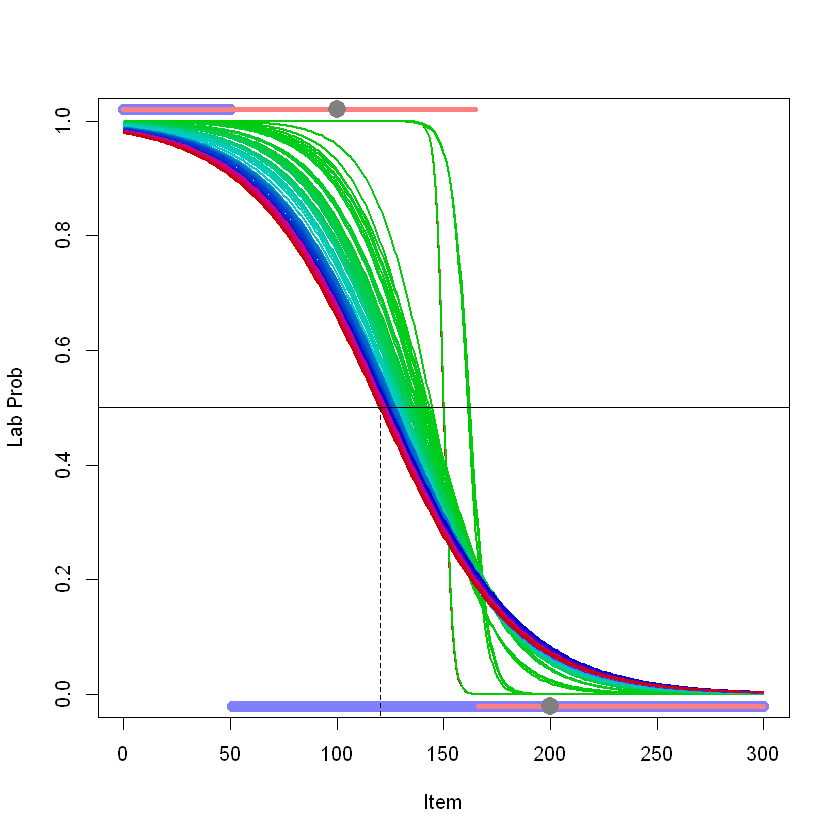

In [75]:
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e1s1, e1s2, pl=T, bin=F, disonly = F, update = F)
options(warn=0)


In [53]:
#To save to file
pdf("disc_orweighted.pdf", width=8, height=8)
par(mar = c(4,3,2,2), oma = c(2,2,2,2))
options(warn=-1)
out <- plot.wlrm.seq(x, e1s1, e1s2, pl=T, bin=F, disonly = F, update = F)
options(warn=0)
dev.off()

png 
  2

Gray dots show the supervised items; horizontal purple bars show item labels provided by source 1; horizontal red lines show labels provided by source 2. Each curve shows the model classifier used with each new learning episode, with early models in red and subsequent models plotted along a rainbow spectrum. The dotted veritcal line shows the location of the final boundary, which shifts toward the far source, but not quite as far as the midpoint between source boundaries.

How does trust change over time? This plot shows proportion of trust given to source 1 (far) over time

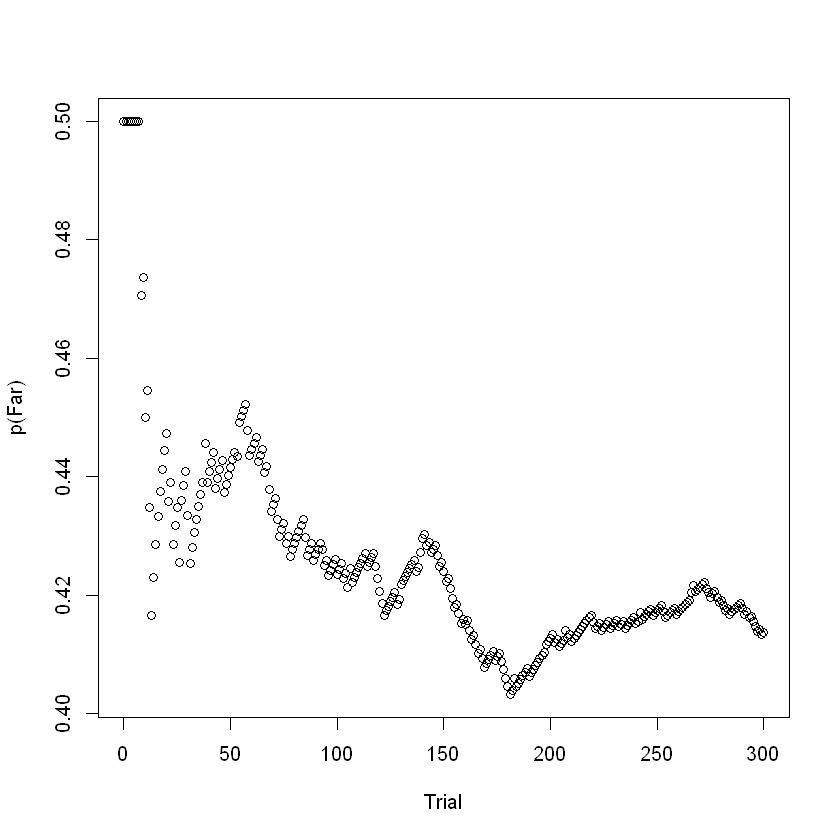

In [17]:
plot(0:300, out[[1]], xlab = "Trial", ylab = "p(Far)")

How does the learner's boundary change over time?

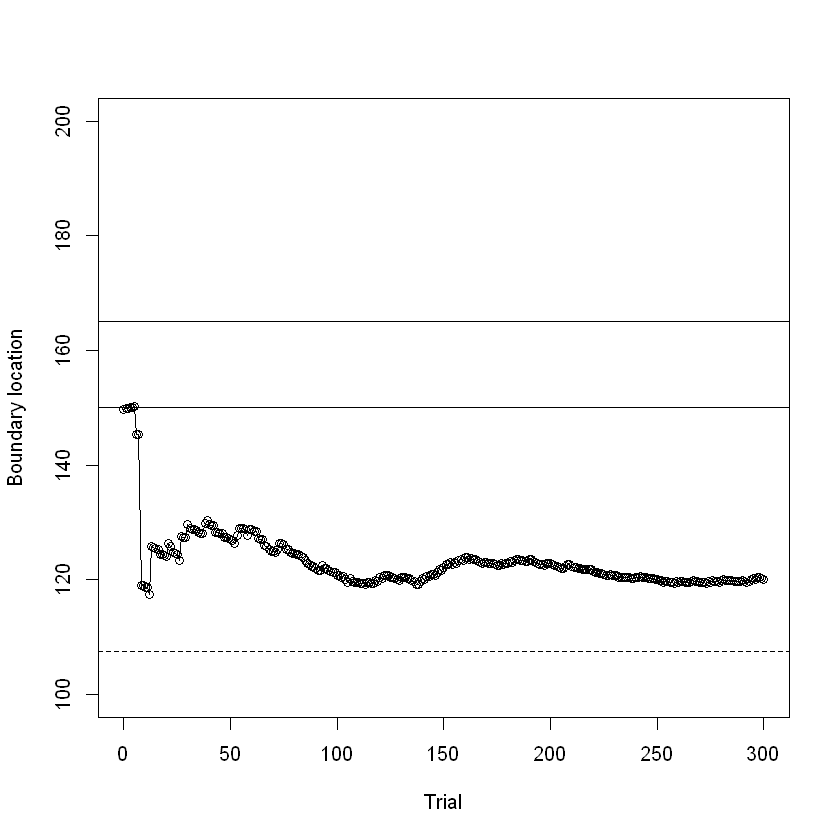

In [18]:
plot(0:300, out[[3]], xlab = c("Trial"), ylab = "Boundary location", ylim = c(100,200), type = "o")
abline(h = c(165, 150, mean(c(50,165))), lty = c(1,1,2))

The results are somewhat consistent with experiment 1--the boundary shifts toward the far source, but not as far as the midpoint between sources (horizontal dotted line).

### Experiment 2

In [81]:
b1 <- -1 * m1$coefficients[1]/m1$coefficients[2]   #Compute initial boundary position
b2 <- rep(0, times = 15)
options(warn=-1) #Turn off warnings here
for(i1 in c(1:15)){
    mslabs <- c(e2s1, e2s2[i1,])                        #Concatenate labels given by two sources
    out <-  plot.wlrm.seq(x, e2s1, e2s2[i1,], pl=F, bin=F, disonly = F, update = F)
    b2[i1] <- out[[3]][301]
}
options(warn=0) #Turn off warnings here


In [82]:
pwt <- rep(0, times = 15)
s <- b2 - b1   #Amount of shift
f <- rowSums(e2s2) - b1  #Distance of variable source to initial boundary
c <- sum(e2s1) - b1      #Distance of fixed source to initial boundary

for(i1 in c(1:15)) pwt[i1] <- get.pwt(s[i1], f[i1], c)

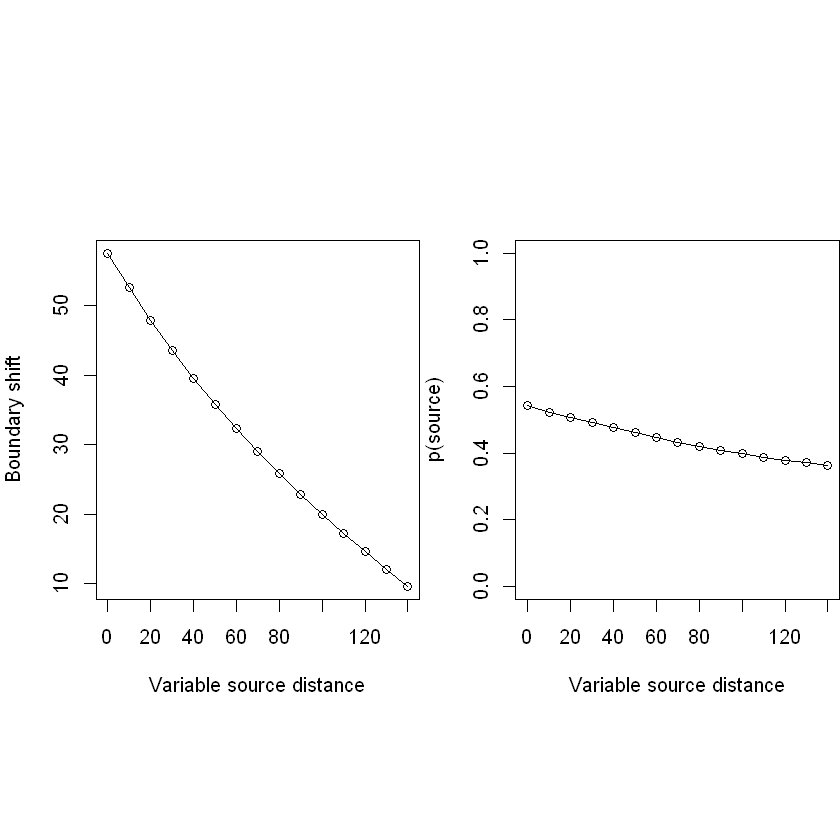

In [83]:
par(mfrow = c(1,2), mar = c(10,4,10,0))
plot(150 - rowSums(e2s2), b2- b1, type = "o", ylab = "Boundary shift", xlab = "Variable source distance")
plot(150 - rowSums(e2s2), pwt, type = "o", ylab = "p(source)", xlab = "Variable source distance",
    ylim = c(0,1))

Negative shift of the boundary is approximately linear with the distance of the variable source, and the estimate of the weight given to the variable source declines linearly with its distance

### Experiment 3

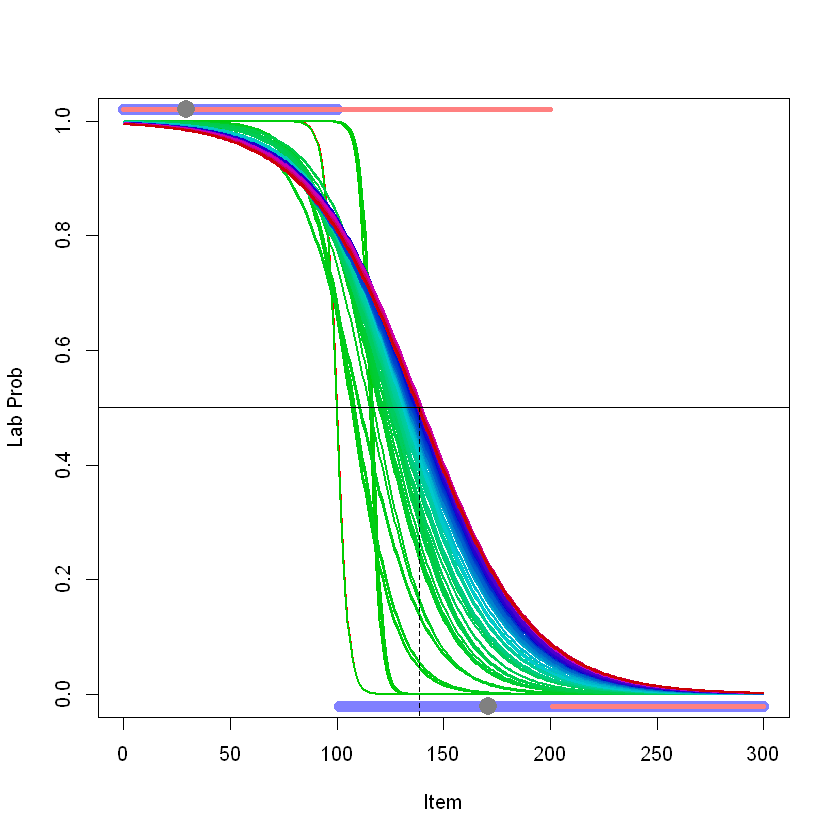

In [84]:
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e3s1, e3s2, citems = e3citems, pl=T, bin=F, disonly = F, update = F)
options(warn=0)

Boundary shifts toward midpoint though does not quite reach it.

In [85]:
#To save to file
pdf("disc_orweighted_exp3.pdf", width=8, height=8)
par(mar = c(4,3,2,2), oma = c(2,2,2,2))
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e3s1, e3s2, citems = e3citems, pl=T, bin=F, disonly = F, update = F)
options(warn=0)
dev.off()

png 
  2

How does trust change over time? Plot shows proportion of trust given to source 1 over time

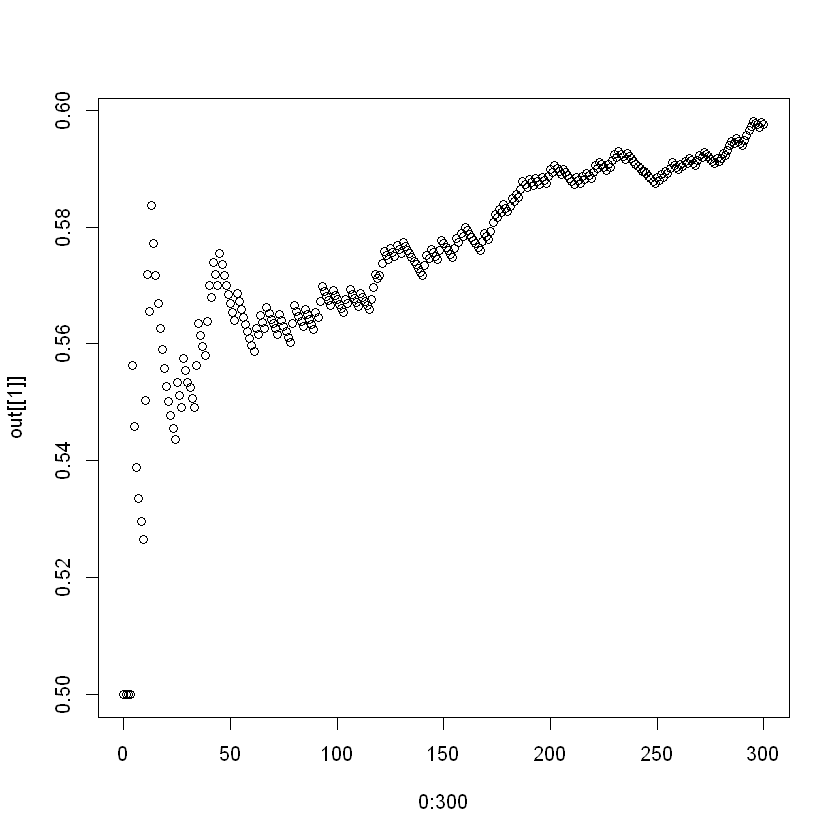

In [23]:
plot(0:300, out[[1]])

More weight is given to closer source, similar to experiment.

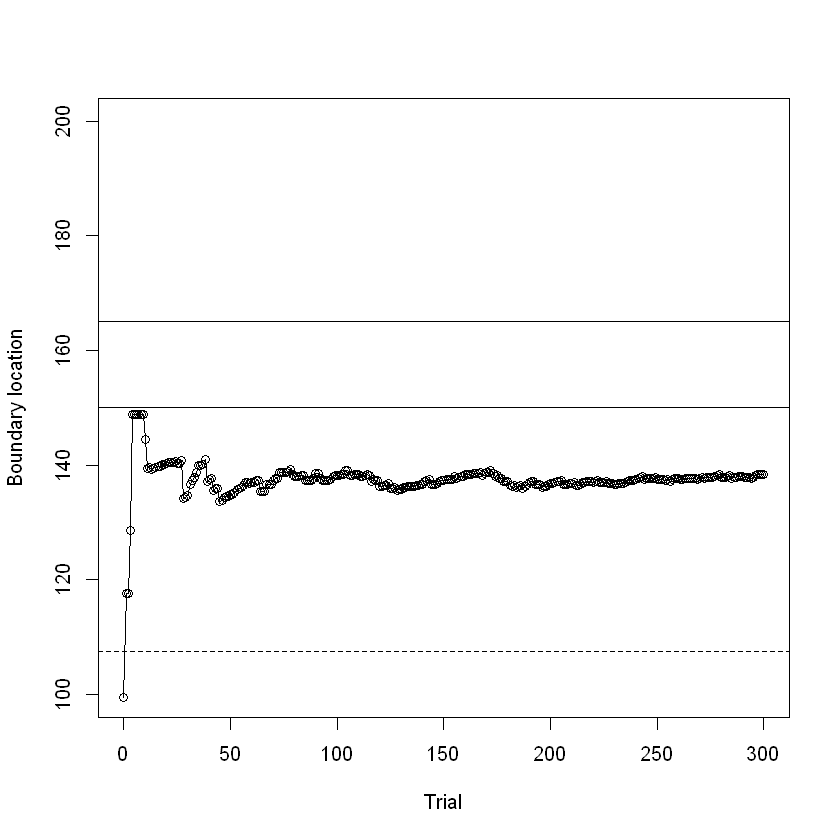

In [24]:
plot(0:300, out[[3]], xlab = c("Trial"), ylab = "Boundary location", ylim = c(100,200), type = "o")
abline(h = c(165, 150, mean(c(50,165))), lty = c(1,1,2))

### Experiment 4

In [35]:
m1 <- glm(clabs ~ e3citems, family = "binomial") #Fit classifier to initial data from suprevised phase
msitems <- c(0:300, 0:300) + ((runif(602)*2)-1)  #Items labeled by multiple sources

tout <- matrix(0,4,2)
options(warn=-1)
t <- get.trust(m1, 0:300, e4has1, e4has2)          #Compute trust for two sources
tout[1,] <- t
mha <- fitwlrm(0:300, e4has1, e4has2, t[1], t[2], citems = e3citems)  #Fit final classifier to all data, giving both sources equal weight

t <- get.trust(m1, 0:300, e4mas1, e4mas2)          #Compute trust for two sources
tout[2,] <- t
mma <- fitwlrm(0:300, e4mas1, e4mas2, t[1], t[2])  #Fit final classifier to all data, giving both sources equal weight

t <- get.trust(m1, 0:300, e4mds1, e4mds2)          #Compute trust for two sources
tout[3,] <- t
mmd <- fitwlrm(0:300, e4mds1, e4mds2, t[1], t[2])  #Fit final classifier to all data, giving both sources equal weight

t <- get.trust(m1, 0:300, e4hds1, e4hds2)          #Compute trust for two sources
tout[4,] <- t
mhd <- fitwlrm(0:300, e4hds1, e4hds2, t[1], t[2])  #Fit final classifier to all data, giving both sources equal weight
options(warn=0)

tout/rowSums(tout)

0.5499660,0.4500340
0.5975053,0.4024947
0.6124586,0.3875414
0.6264468,0.3735532


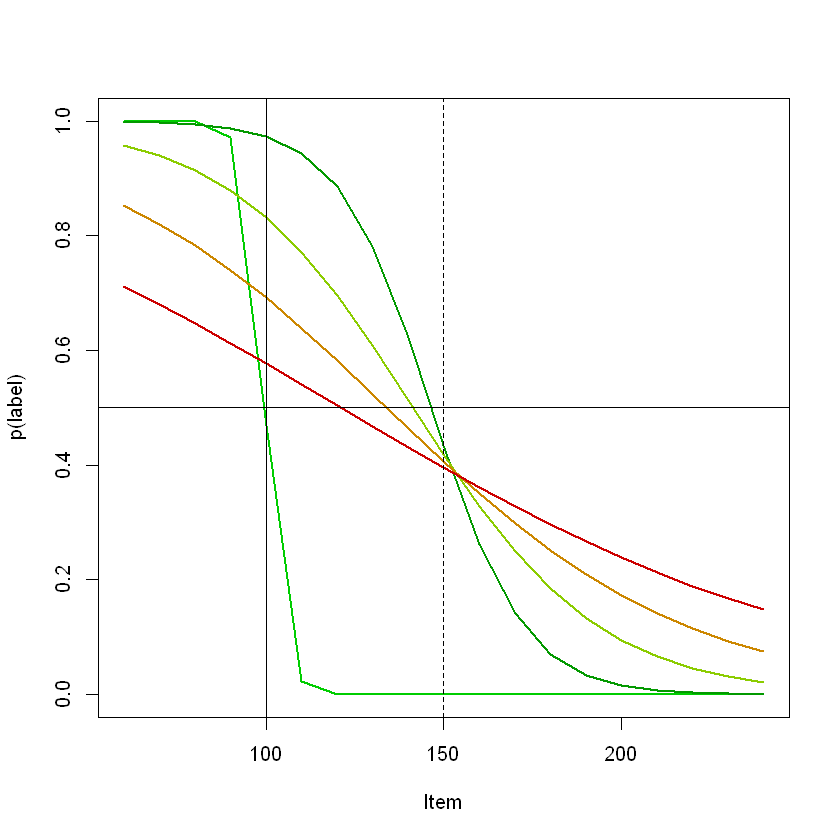

In [36]:
#Plot predictions
plot(gtest, get.wlrm.pred(m1, gtest), ylim = c(0,1), xlim = range(gtest), 
     type = "l", lwd = 2, col = 3,
    xlab = "Item", ylab = "p(label)")
lines(gtest, get.wlrm.pred(mha, gtest), lwd = 2, col = hsv(.33,1,.6))
lines(gtest, get.wlrm.pred(mma, gtest), lwd = 2, col = hsv(.22,1,.8))
lines(gtest, get.wlrm.pred(mmd, gtest), lwd = 2, col = hsv(.11,1,.8))
lines(gtest, get.wlrm.pred(mhd, gtest), lwd = 2, col = hsv(0,1,.8))

abline(h = 0.5)
abline(v = 100)
abline(v = mean(c(100, 200)), lty = 2)

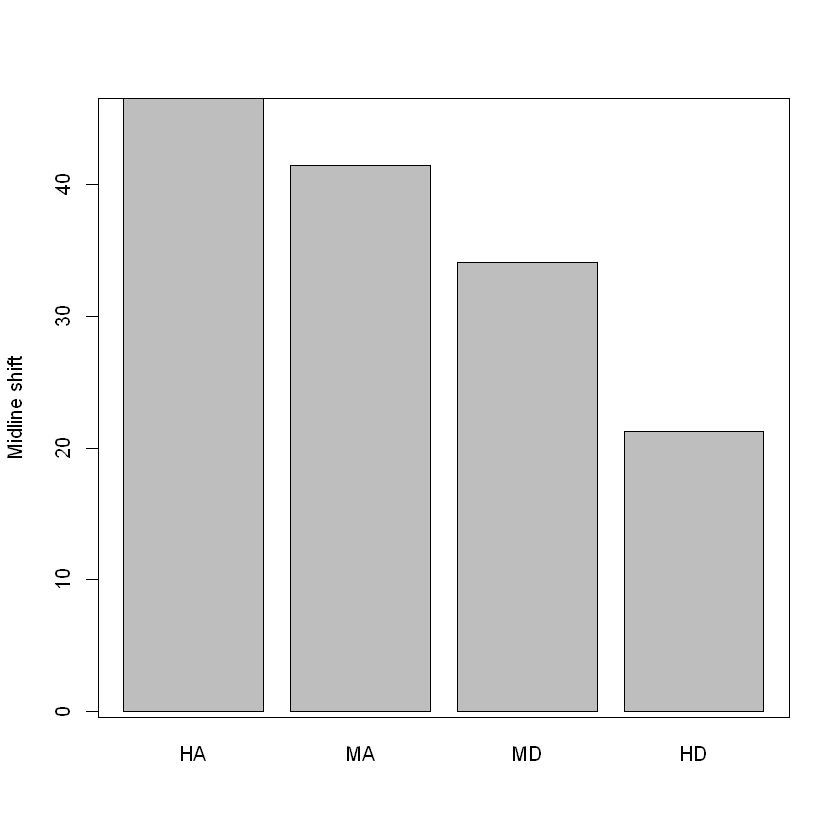

In [37]:
bshift <- rep(0, times = 4)
bshift[1] <- -1 * mha$coefficients[1]/mha$coefficients[2] - 100 
bshift[2] <- -1 * mma$coefficients[1]/mma$coefficients[2] - 100 
bshift[3] <- -1 * mmd$coefficients[1]/mmd$coefficients[2] - 100 
bshift[4] <- -1 * mhd$coefficients[1]/mhd$coefficients[2] - 100 

barplot(bshift, beside = T, names.arg = c("HA","MA","MD","HD"), ylab = "Midline shift"); box()

Boundary always shifts toward the midline, though amount of shift diminshes as sources get farther from midline.

## Online weighted model

In this variant, the learner's current model is always used to weight the two sources of information, so the source weightings gradually change over time. The method for computing source weights is the same as for the fixed-weighting approach, but instead of using the initial model to always estimate source weights, we instead use the learner's current model. So the model at time t is used to estimate weights for both sources, given the full history of labels they have provided up to time t. At time t+1 a new training example appears, along with the labels provided by each source. A new model is fit to the full history of labeled items including those just provied, and applying the weights calculated at time t for the two sources. Then the process iterates. Thus the weights given to the two sources will change over time as the learner's own categorization function changes.

### Experiment 1

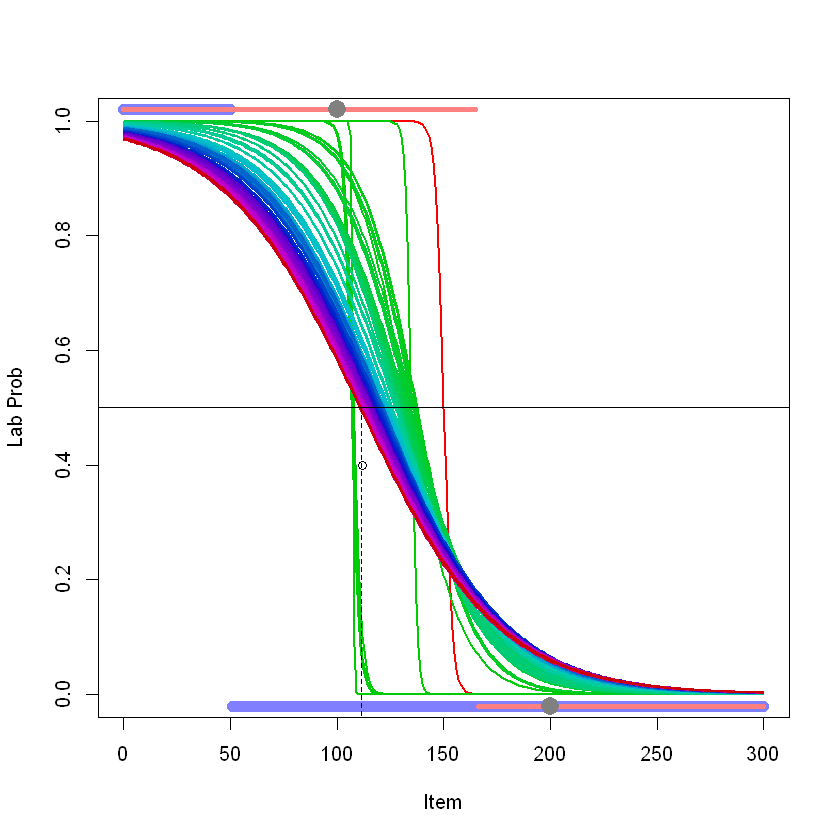

In [89]:
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e1s1, e1s2, pl=T, bin=F, disonly = F)
options(warn=0)
points(112,.4)

In [90]:
#To save to file
pdf("disc_ownweighted_exp1.pdf", width=8, height=8)
par(mar = c(4,3,2,2), oma = c(2,2,2,2))
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e1s1, e1s2, pl=T, bin=F, disonly = F)
options(warn=0)
dev.off()

png 
  2

The boundary shifts to be very close to the midpoint between source boundaries.

We can see how the boundary location changes over time as follows:

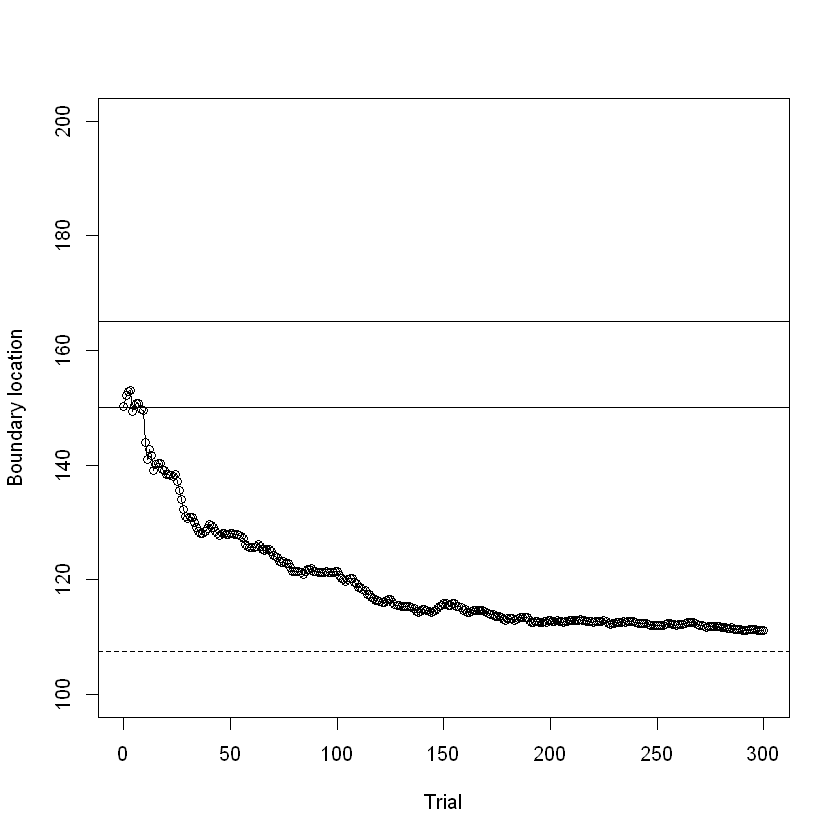

In [91]:
plot(0:300, out[[3]], xlab = c("Trial"), ylab = "Boundary location", ylim = c(100,200), type = "o")
abline(h = c(165, 150, mean(c(50,165))), lty = c(1,1,2))

The boundary falls just shy of the midpoint between source boundaries (dotted horizontal line),

How does the weight given to the far source change over time?

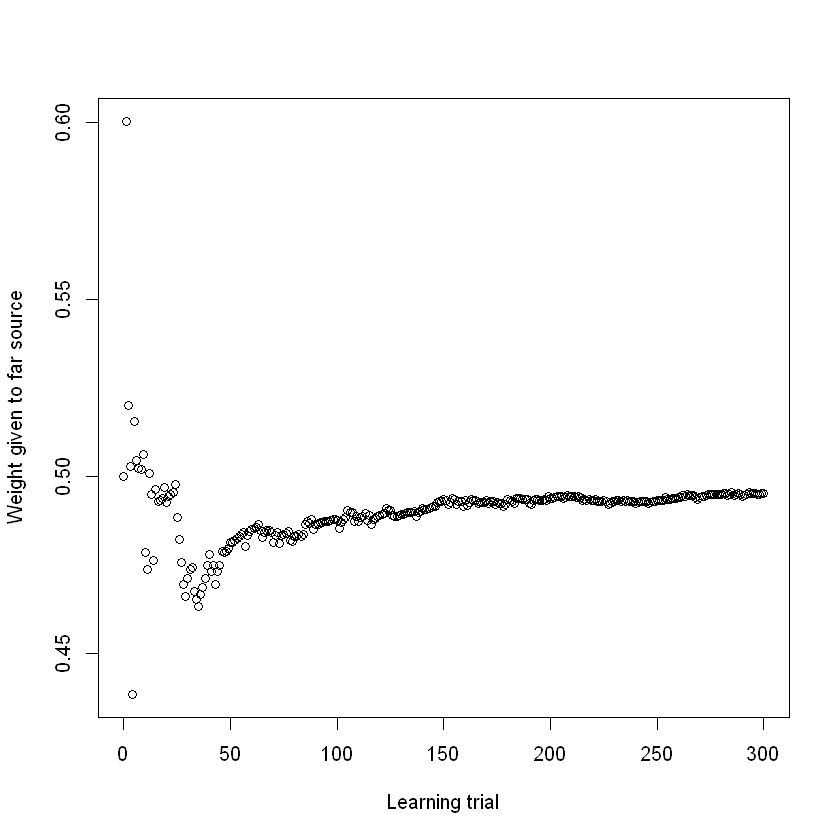

In [92]:
plot(0:300, out[[1]], xlab = "Learning trial", ylab = "Weight given to far source")

Interestingly, the model ends up giving almost equal weight to the two sources.

### Experiment 2

In [93]:
b1 <- -1 * m1$coefficients[1]/m1$coefficients[2]   #Compute initial boundary position
b2 <- rep(0, times = 15)
options(warn=-1) #Turn off warnings here
for(i1 in c(1:15)){
    mslabs <- c(e2s1, e2s2[i1,])                        #Concatenate labels given by two sources
    out <-  plot.wlrm.seq(x, e2s1, e2s2[i1,], pl=F, bin=F, disonly = F, update = T)
    b2[i1] <- out[[3]][301]
}
options(warn=0) #Turn off warnings here


In [94]:
pwt <- rep(0, times = 15)
s <- b2 - b1   #Amount of shift
f <- rowSums(e2s2) - b1  #Distance of variable source to initial boundary
c <- sum(e2s1) - b1      #Distance of fixed source to initial boundary

for(i1 in c(1:15)) pwt[i1] <- get.pwt(s[i1], f[i1], c)

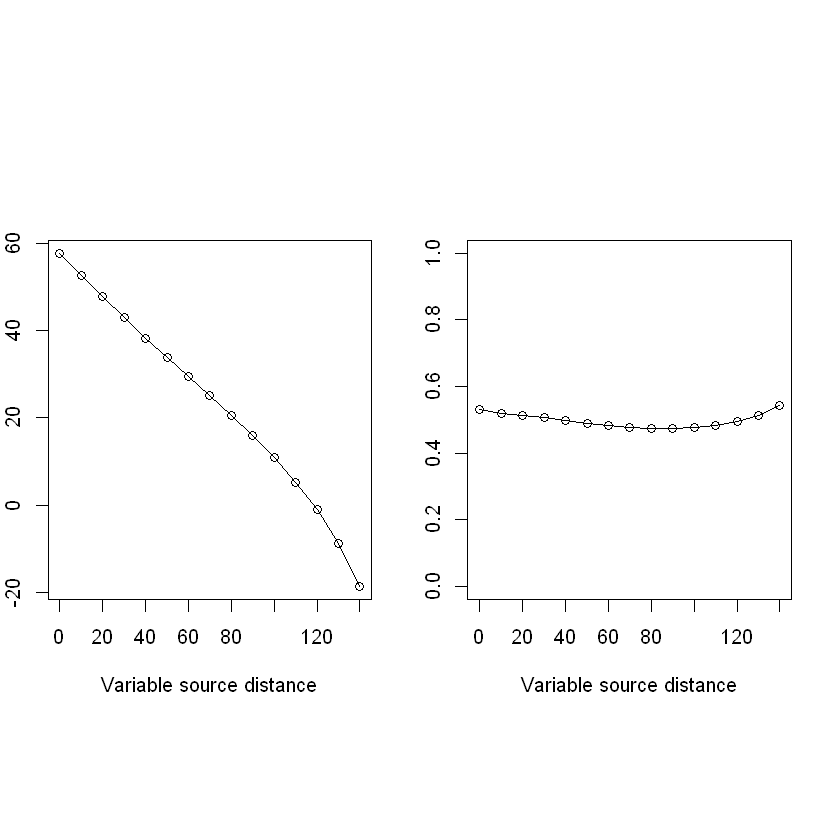

In [95]:
par(mfrow = c(1,2), mar = c(10,2,10,2))
plot(150 - rowSums(e2s2), b2- b1, type = "o", ylab = "Boundary shift", xlab = "Variable source distance")
plot(150 - rowSums(e2s2), pwt, type = "o", ylab = "p(source)", xlab = "Variable source distance",
    ylim = c(0,1))

Negative shift still increases linearly (approximately) with variable distance, weirdly weight seems constant...

### Experiment 3

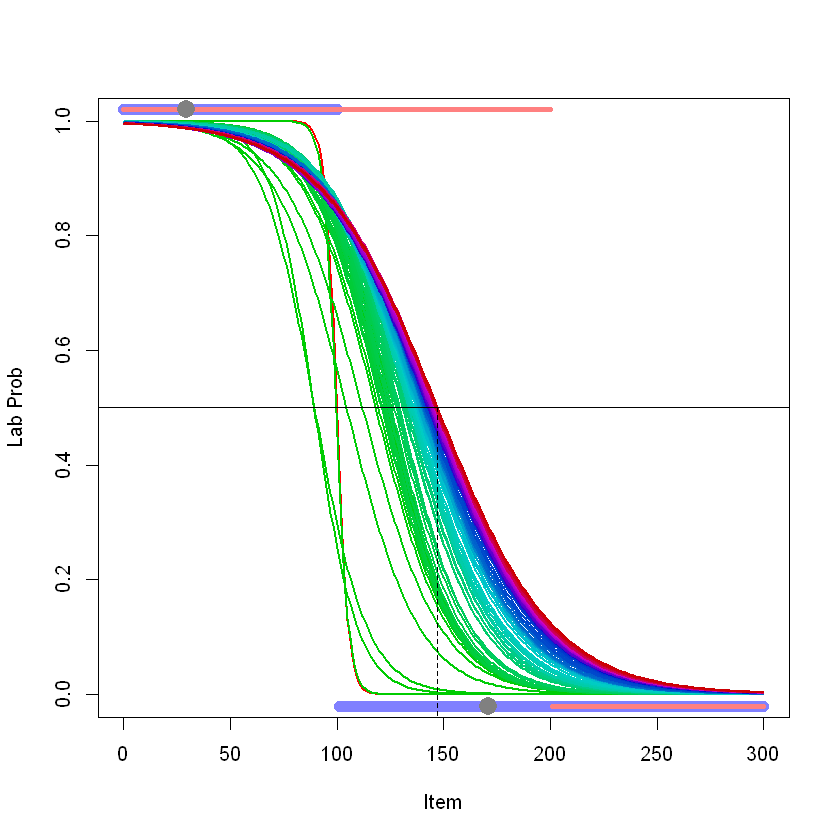

In [96]:
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e3s1, e3s2, citems = e3citems, pl=T, bin=F, disonly = F)
options(warn=0)

In [97]:
#save plot
pdf("disc_ownwt_exp3.pdf", width=8, height=8)
par(oma = c(4,3,2,2), mar = c(2,2,2,2))
options(warn=-1) #Turn off warnings here
out <- plot.wlrm.seq(x, e3s1, e3s2, citems = e3citems, pl=T, bin=F, disonly = F)
options(warn=0)
dev.off()

png 
  2

Boundary moves v close to midpoint between sources.

Boundary change over time:

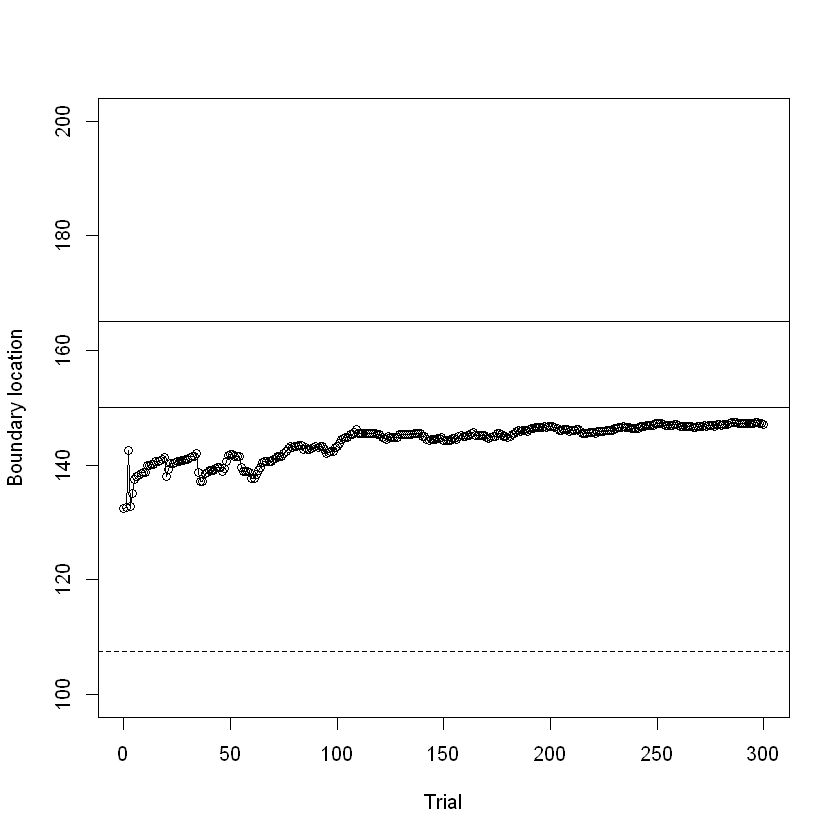

In [98]:
plot(0:300, out[[3]], xlab = c("Trial"), ylab = "Boundary location", ylim = c(100,200), type = "o")
abline(h = c(165, 150, mean(c(50,165))), lty = c(1,1,2))

How does the weight given to the far source change over time?

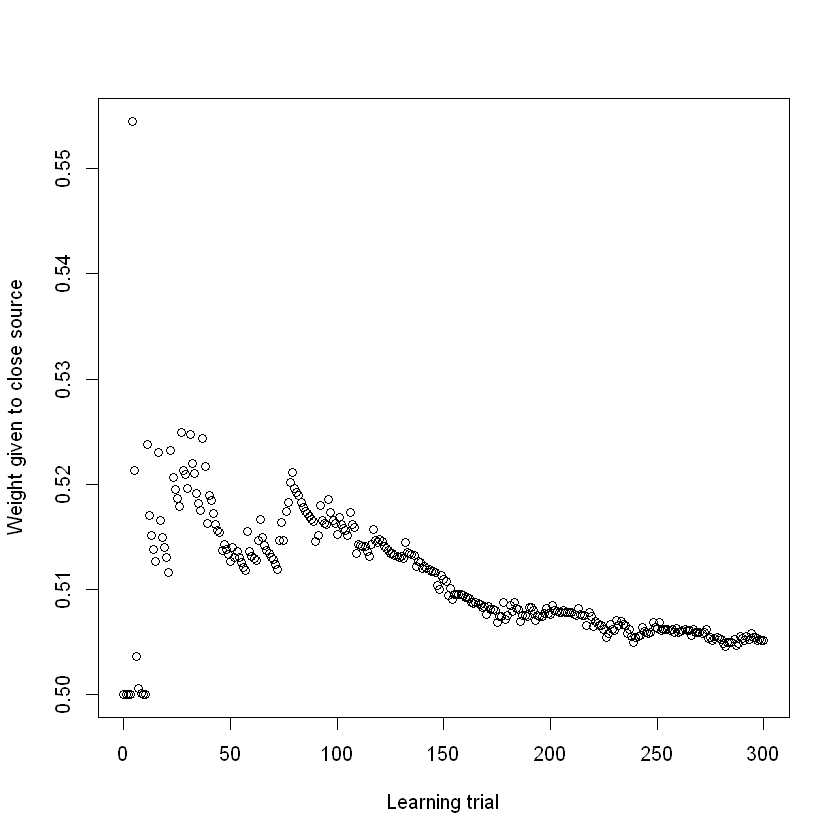

In [34]:
plot(0:300, out[[1]], xlab = "Learning trial", ylab = "Weight given to close source")

More weight given to close source, but only just.

## Experiment 4

In [38]:
options(warn=-1) #Turn off warnings here
out.has <- plot.wlrm.seq(x, e4has1, e4has2, citems = e3citems, pl=F, bin=F, disonly = F, update=T)
out.mas <- plot.wlrm.seq(x, e4mas1, e4mas2, citems = e3citems, pl=F, bin=F, disonly = F, update=T)
out.mds <- plot.wlrm.seq(x, e4mds1, e4mds2, citems = e3citems, pl=F, bin=F, disonly = F, update=T)
out.hds <- plot.wlrm.seq(x, e4hds1, e4hds2, citems = e3citems, pl=F, bin=F, disonly = F, update=T)
options(warn=0)

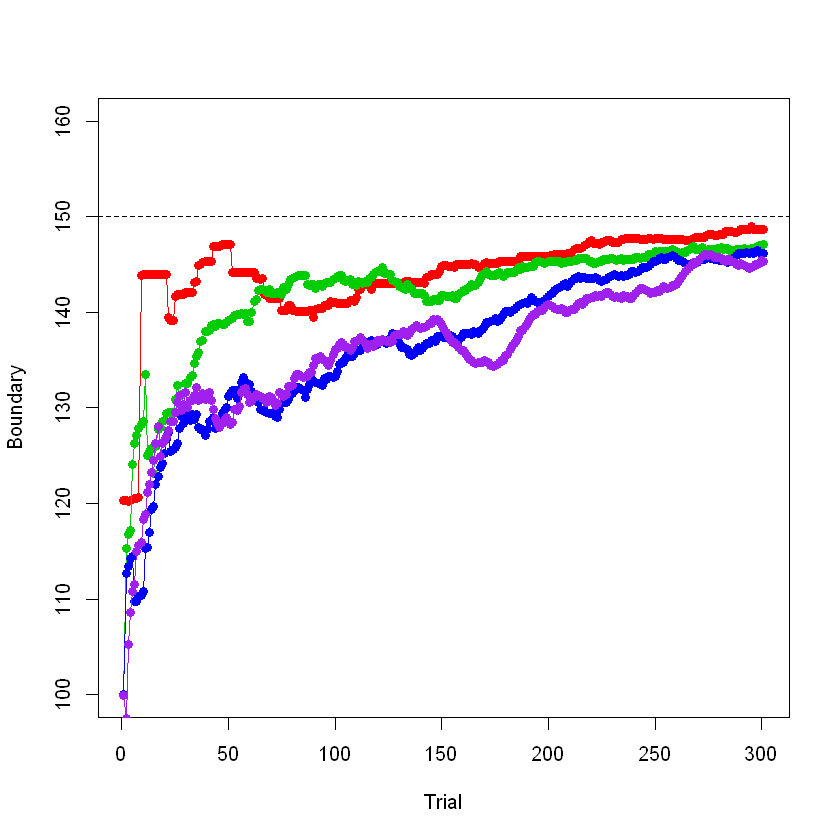

In [45]:
plot(out.has[[3]], type = "o", pch = 16, col = 2, ylim = c(100,160), ylab = "Boundary", xlab="Trial")
lines(out.mas[[3]], type="o", pch=16, col = 3)
lines(out.mds[[3]], type="o", pch=16, col = "blue")
lines(out.hds[[3]], type="o", pch=16, col = "purple")
abline(h=150, lty = 2)

Plots location of boundary over time in Experiment 4 simulation with online trust updating. All conditions move toward midpoint between sources.